<a href="https://colab.research.google.com/github/AmrinKareem/PyTorch-DeepLearning/blob/main/02_PyTorch_NN_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Neural Network Classification

One thing or another: spam vs not spam, dogs vs cats, etc

#1. Make classification data and get it ready

In [1]:
import sklearn
from sklearn.datasets import make_circles

#Make 1000 samples 
n_samples = 1000

#Create circles
X, y = make_circles(n_samples, 
                    noise =0.03,
                    random_state = 42)


In [2]:
len(X), len(y)

(1000, 1000)

In [3]:
print(f"First 5 samples of X:{X[:5]}")
print(f"First 5 samples of y:{y[:5]}")

First 5 samples of X:[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y:[1 1 1 1 0]


In [4]:
#Make dataframe of circles data
import pandas as pd
circles = pd.DataFrame({"X1": X[:,0],
                       "X2": X[:,1],
                       "label": y})

circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


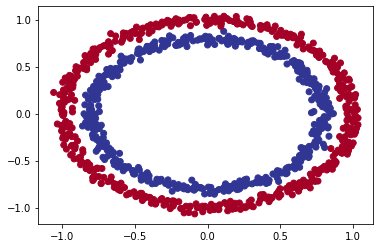

In [5]:
import matplotlib.pyplot as plt

plt.scatter(x =  X[:,0], y = X[:,1], c = y, cmap = plt.cm.RdYlBu);

The data that we're working with is a toy dataset; small enough to experiment but large enough to practice the fundamentals.


###1.1 Check input and output shapes

In [6]:
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
#View the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and for y: {y_sample.shape} ")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and for y: () 


###1.2 Turn into tensors and Split data into train and test

In [8]:
import torch
torch.__version__

'1.13.1+cu116'

In [9]:
type(X)

numpy.ndarray

In [10]:
#Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]


(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]), tensor([1., 1., 1., 1., 0.]))

In [11]:
type(X), type(y)

(torch.Tensor, torch.Tensor)

In [12]:
X.dtype, y.dtype

(torch.float32, torch.float32)

In [13]:
#Split data 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 42)

In [14]:
len(X_train), len(y_train), len(X_test), len(y_test)

(800, 800, 200, 200)

In [15]:
n_samples

1000

##Build a Model


In [16]:
import torch
from torch import nn

# Set up device agnostic code
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
DEVICE


'cuda'

In [17]:
#1. Create a model by subclassing nn.Module
#2. Create 2 nn.Linear layers
#3. Define a forward method that outlineds the forward computation
#4. Instantiate an instance of our model class and send it to device

class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    
    self.layer_1 = nn.Linear(in_features = 2, #takes in 2 features and upscales to 5 features
                             out_features = 5)
    self.layer_2 = nn.Linear(in_features = 5, 
                             out_features = 1)
    
  def forward(self, x):
    return self.layer_2(self.layer_1(x)) 

#Instance of model class
model_0 = CircleModelV0().to(DEVICE)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [18]:
next(model_0.parameters()).to(DEVICE)

Parameter containing:
tensor([[ 0.1499, -0.5472],
        [ 0.2830,  0.1442],
        [ 0.4746,  0.2367],
        [-0.1429, -0.2808],
        [-0.0677, -0.0932]], device='cuda:0', requires_grad=True)

In [19]:
#let's replicate this model using nn.Sequential()

model_0 = nn.Sequential(
    nn.Linear(in_features = 2, out_features = 5),
    nn.Linear(in_features = 5, out_features = 1)
).to(DEVICE)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [20]:
model_0.state_dict()

OrderedDict([('0.weight', tensor([[-0.5183, -0.6170],
                      [ 0.2101, -0.3232],
                      [ 0.0802,  0.5951],
                      [-0.6917, -0.3135],
                      [-0.0239, -0.5215]], device='cuda:0')),
             ('0.bias',
              tensor([-0.5073, -0.1938,  0.1570,  0.0657,  0.4159], device='cuda:0')),
             ('1.weight',
              tensor([[-0.2624,  0.1826,  0.1664, -0.1468,  0.3448]], device='cuda:0')),
             ('1.bias', tensor([-0.2407], device='cuda:0'))])

In [21]:
#Make predictions
untrained_preds = model_0(X_test.to(DEVICE))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"First 10 test samples: {untrained_preds[:10]}")
print(f"First 10 Labels: {y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])
First 10 test samples: tensor([[-0.0420],
        [ 0.0867],
        [-0.2020],
        [ 0.0026],
        [ 0.0794],
        [ 0.1557],
        [ 0.2950],
        [ 0.3119],
        [-0.2136],
        [ 0.0984]], device='cuda:0', grad_fn=<SliceBackward0>)
First 10 Labels: tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [22]:
## 2.1 Set up loss function and optimizer
loss_fn = torch.nn.BCEWithLogitsLoss() #Has a sigmoid activation function built in
optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 0.1)

In [23]:
#Calculation of accuracy
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred))*100
  return acc  


In [24]:
#3. Training a model

#forward pass
#calculate the loss
#optimizer zero grad
#loss backward
#optimizer step

#But first we need to make sure that the model outputs are predictions labels. 
#For this we convert the logits to prediction probabiities by passing through a 
#sigmoid function for BCE loss or softmax function for multiclass

#Convert them to labels by rounding (binary classification) or argmax (multiclass)

#First we move all variables to device
X_train = X_train.to(DEVICE)
X_test = X_test.to(DEVICE)
y_train = y_train.to(DEVICE)
y_test = y_test.to(DEVICE)


In [25]:
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test)[:5]
y_logits

tensor([[-0.0420],
        [ 0.0867],
        [-0.2020],
        [ 0.0026],
        [ 0.0794]], device='cuda:0')

These are the logits. They are the outputs that haven't been passed through the activation function.

In [26]:
#Use the sigmoid activation function on the logits to 
#turn them into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4895],
        [0.5217],
        [0.4497],
        [0.5007],
        [0.5198]], device='cuda:0')

We perform rounding to get prediction labels

In [27]:
#get prediction probabilities
y_preds = torch.round(y_pred_probs)

#Combine everything into one line:
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test)[:5]))

#Check for equality
print(torch.eq(y_pred_labels.squeeze(), y_pred_labels.squeeze()))

#Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 1., 0., 1., 1.], device='cuda:0')

In [28]:
y_test[:5]

tensor([1., 0., 1., 0., 1.], device='cuda:0')

###Build a Training and Test Loop

In [29]:
#reproducibility
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#set epochs
epochs = 100

for epoch in range(epochs):
  model_0.train()
  
  #1. Forward pass
  y_logits = model_0(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))

  #2. Calculate loss
  #loss = loss_fn(torch.sigmoid(y_logits, y_train)) #BCELoss expects prediction probabilities as input
  loss = loss_fn(y_logits, y_train) #BCEWithLogitsLoss expects the logits as input
  acc = accuracy_fn(y_true = y_train, y_pred = y_preds)

  #3. Optimizer zero grad
  optimizer.zero_grad()

  #4. Loss backward
  loss.backward()

  #5. Optimizer step (gradient descent)

  optimizer.step()

  ###Testing

  model_0.eval()
  with torch.inference_mode():
    #Forward pass
    y_test_logits = model_0(X_test)
    y_test_pred = torch.round(torch.sigmoid(y_test_logits))

    #Calculate loss
    test_loss = loss_fn(y_test_logits.squeeze(), y_test)
    test_acc = accuracy_fn(y_true = y_test, y_pred = y_test_pred)

  #Print what happens:
  if epoch%10==0:
    print(f"Epoch: {epoch} | Training Loss: {loss} | Test Loss: {test_loss} | Train Accuracy : {acc:.2f}% | Test Accuracy: {test_acc:.2f}%")


Epoch: 0 | Training Loss: 0.6964176297187805 | Test Loss: 0.7017177939414978 | Train Accuracy : 51.25% | Test Accuracy: 10000.00%
Epoch: 10 | Training Loss: 0.6957117319107056 | Test Loss: 0.7002819776535034 | Train Accuracy : 50.88% | Test Accuracy: 10000.00%
Epoch: 20 | Training Loss: 0.6952017545700073 | Test Loss: 0.6991970539093018 | Train Accuracy : 51.12% | Test Accuracy: 10000.00%
Epoch: 30 | Training Loss: 0.6948175430297852 | Test Loss: 0.6983545422554016 | Train Accuracy : 50.50% | Test Accuracy: 10000.00%
Epoch: 40 | Training Loss: 0.6945193409919739 | Test Loss: 0.6976879239082336 | Train Accuracy : 50.50% | Test Accuracy: 10000.00%
Epoch: 50 | Training Loss: 0.6942826509475708 | Test Loss: 0.6971531510353088 | Train Accuracy : 50.38% | Test Accuracy: 10000.00%
Epoch: 60 | Training Loss: 0.6940913200378418 | Test Loss: 0.6967196464538574 | Train Accuracy : 50.38% | Test Accuracy: 10000.00%
Epoch: 70 | Training Loss: 0.6939346194267273 | Test Loss: 0.6963655948638916 | Trai

##Inspect the Dataframe and Visualize how our Model Performs on the Data

In [30]:
#Our model is just random guessing
#Make predictions and evaluate the model
#We are going to import a function call plot_decision_boundary()

import requests
from pathlib import Path

#Download helper functions from Learn Pytorch repo if not already downloaded
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Download helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary



helper_functions.py already exists, skipping download


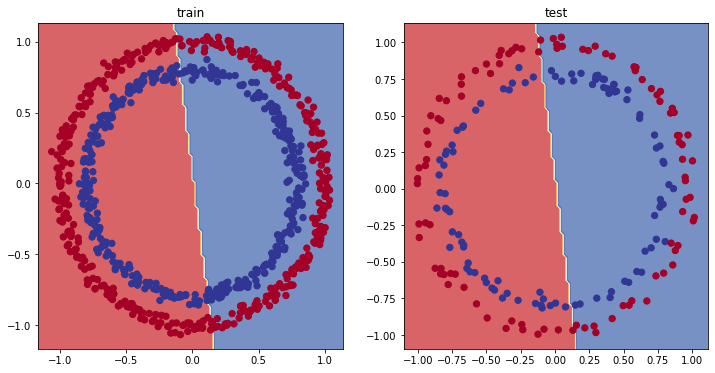

In [31]:
#Plot decision boundary 
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_0, X_test, y_test)

We cannot separate the circles using a linear model. We need to improve the neural network.

##5. Improving a model (from a model perspective)

* Add more hidden units - increase from 5 to 10 units
* Add more layers - give the model mor chance to learn about patterns in the data
* Change the activation function
* Fit for longer - more epochs
* Change the learning rate
* Change the loss function

These are from the model's perspective because they deal directly with the data

In [32]:
# Create an upfdated model:
class circleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 2, out_features = 10)
    self.layer_2 = nn.Linear(in_features = 10, out_features = 10)
    self.layer_3 = nn.Linear(in_features = 10, out_features = 1)

  def forward(self, x):
    # z = self.layer_1(x)
    # z = self.layer_2(z)
    # z = self.layer_3(z)
    return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = circleModelV1().to(DEVICE)
model_1

circleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [33]:
model_1.state_dict()

OrderedDict([('layer_1.weight', tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984], device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222, -0.2426,  0

In [34]:
#Define loss function
loss_fn = nn.BCEWithLogitsLoss()

#Define optimizer
optimizer = torch.optim.SGD(params = model_1.parameters(),
                         lr = 0.1)

In [35]:
#traing and evaluation loop
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#Train for longer
epochs = 1000

#Put data to target devoice
X_train, y_train = X_train.to(DEVICE), y_train.to(DEVICE)
X_test, y_test = X_test.to(DEVICE), y_test.to(DEVICE)

#training loop
for epoch in range(epochs):
  model_1.train()
  #forward pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) #converts 
  #calculate loss 
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true = y_train, 
                    y_pred = y_pred)
  #optimizer zero grad
  optimizer.zero_grad()

  #loss backward
  loss.backward()

  #optimizer step
  optimizer.step()

  ###testing
  model_1.eval()
  with torch.inference_mode():
    y_test_logits = model_1(X_test).squeeze()
    y_test_preds = torch.round(torch.sigmoid(y_test_logits))

    test_loss = loss_fn(y_test_logits, y_test)
    test_acc = accuracy_fn(y_true = y_test, y_pred = y_test_preds)

  if epoch%100 == 0:
    print(f"Epoch: {epoch} | Training Loss : {loss:.3f} | Train Accuracy : {acc:.3f} | Test loss: {test_loss:.3f} | Test accuracy | {test_acc:.3f}")

Epoch: 0 | Training Loss : 0.694 | Train Accuracy : 50.875 | Test loss: 0.693 | Test accuracy | 51.000
Epoch: 100 | Training Loss : 0.693 | Train Accuracy : 50.375 | Test loss: 0.694 | Test accuracy | 48.000
Epoch: 200 | Training Loss : 0.693 | Train Accuracy : 51.125 | Test loss: 0.694 | Test accuracy | 46.000
Epoch: 300 | Training Loss : 0.693 | Train Accuracy : 51.625 | Test loss: 0.695 | Test accuracy | 45.000
Epoch: 400 | Training Loss : 0.693 | Train Accuracy : 51.125 | Test loss: 0.695 | Test accuracy | 46.000
Epoch: 500 | Training Loss : 0.693 | Train Accuracy : 51.000 | Test loss: 0.695 | Test accuracy | 46.000
Epoch: 600 | Training Loss : 0.693 | Train Accuracy : 51.000 | Test loss: 0.695 | Test accuracy | 46.000
Epoch: 700 | Training Loss : 0.693 | Train Accuracy : 51.000 | Test loss: 0.695 | Test accuracy | 46.000
Epoch: 800 | Training Loss : 0.693 | Train Accuracy : 51.000 | Test loss: 0.695 | Test accuracy | 46.000
Epoch: 900 | Training Loss : 0.693 | Train Accuracy : 51.

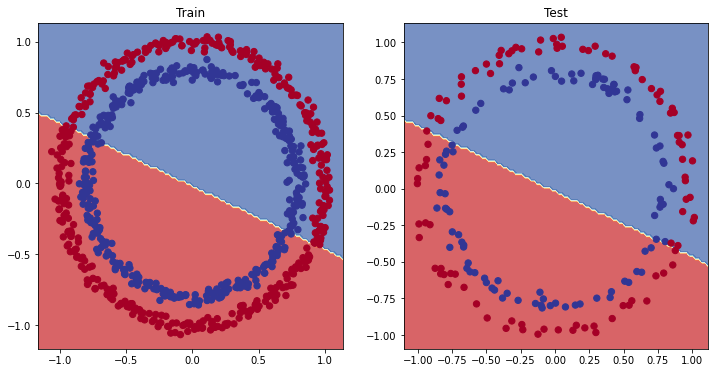

In [36]:
#Plot the decision boundary

plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

##Can this model learn anything?


In [37]:
#create dummy data

weight = 0.3
bias = 0.7

X = torch.arange(0, 1, 0.01).unsqueeze(dim = 1)
y = weight*X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900]]), tensor([[0.7000],
         [0.7030],
         [0.7060],
         [0.7090],
         [0.7120],
         [0.7150],
         [0.7180],
         [0.7210],
         [0.7240],
         [0.7270]]))

In [38]:
#split into test and train

train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [39]:
len(X_test), len(y_test), len(X_train), len(y_train)

(20, 20, 80, 80)

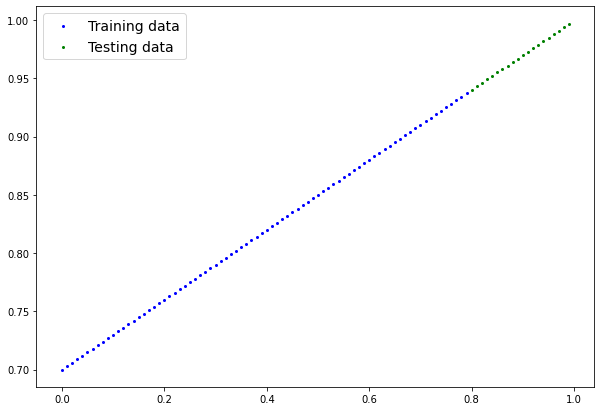

In [40]:
plot_predictions(train_data = X_train,
                 train_labels = y_train,
                 test_labels = y_test,
                 test_data = X_test)

In [41]:
#Adjust model 1 to fit a straight line

#same architecture as model_1, but input features is input features since we only have one feature per label

model_2 = nn.Sequential(
    nn.Linear(in_features = 1, out_features = 10),
    nn.Linear(in_features = 10, out_features = 10),
    nn.Linear(in_features = 10, out_features = 1)
              
).to(DEVICE)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [42]:
#loss function and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_2.parameters(),
                            lr = 0.01)

In [43]:
#training loop

torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

X_train, y_train = X_train.to(DEVICE), y_train.to(DEVICE)
X_test, y_test = X_test.to(DEVICE), y_test.to(DEVICE)

for epoch in range(epochs):
  model_2.train()
  y_preds = model_2(X_train)
  loss = loss_fn(y_preds, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


#testing
  model_2.eval()
  with torch.inference_mode():
    y_test_preds = model_2(X_test)
    test_loss = loss_fn(y_test_preds,y_test)
    
  if epoch%100==0:
    print(f"Epoch :{epoch} | train_loss: {loss} | test loss :{test_loss}")


Epoch :0 | train_loss: 1.0018585920333862 | test loss :0.9530288577079773
Epoch :100 | train_loss: 0.029713837429881096 | test loss :0.012475362978875637
Epoch :200 | train_loss: 0.03203091770410538 | test loss :0.004141527693718672
Epoch :300 | train_loss: 0.026036689057946205 | test loss :0.008628643117845058
Epoch :400 | train_loss: 0.02628697268664837 | test loss :0.007267382927238941
Epoch :500 | train_loss: 0.024811724200844765 | test loss :0.008241826668381691
Epoch :600 | train_loss: 0.028935402631759644 | test loss :0.001630356884561479
Epoch :700 | train_loss: 0.025019129738211632 | test loss :0.005932837724685669
Epoch :800 | train_loss: 0.02826792001724243 | test loss :0.000517857086379081
Epoch :900 | train_loss: 0.027124768123030663 | test loss :0.0011604070896282792


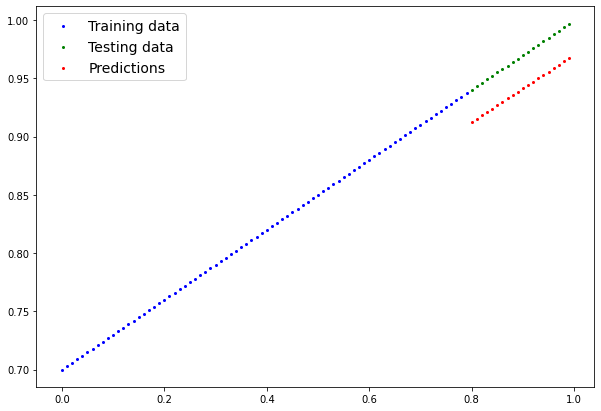

In [44]:
model_2.eval()
with torch.inference_mode():
  y_test_preds = model_2(X_test)
  plot_predictions(train_data = X_train.cpu(), 
                   train_labels = y_train.cpu(), 
                   test_data = X_test.cpu(), 
                   test_labels = y_test.cpu(),
                   predictions = y_test_preds.cpu())

##Getting Started with Non Linearities 

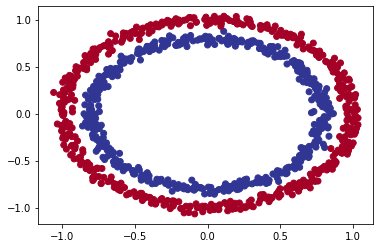

In [45]:
#non linear activations
#Make and plot data 
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples =  1000

X, y = make_circles(n_samples, noise = 0.03, random_state = 42)
plt.scatter(X[:,0], X[:,1], c = y, cmap = plt.cm.RdYlBu)

In [46]:
#Convert to tensors and test-train splits

import torch
from sklearn.model_selection import train_test_split
#Turn data into tensors

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

#Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)


##Building a model with non linearity

In [47]:
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(in_features = 2, out_features = 100)
    self.layer2 = nn.Linear(in_features = 100, out_features = 200)
    self.layer3 = nn.Linear(in_features = 200, out_features = 100)
    self.layer4 = nn.Linear(in_features = 100, out_features = 1)
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.layer4(self.layer3(self.relu(self.layer2(self.relu(self.layer1(x))))))

model3 = CircleModelV2().to(DEVICE)
model3


CircleModelV2(
  (layer1): Linear(in_features=2, out_features=100, bias=True)
  (layer2): Linear(in_features=100, out_features=200, bias=True)
  (layer3): Linear(in_features=200, out_features=100, bias=True)
  (layer4): Linear(in_features=100, out_features=1, bias=True)
  (relu): ReLU()
)

In [48]:
#loss and optimizer

loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params = model3.parameters(), lr = 0.01)


In [49]:
#training

torch.manual_seed(42)
torch.cuda.manual_seed(42)

#put all data to devoice
X_train, y_train, X_test, y_test = X_train.to(DEVICE), y_train.to(DEVICE), X_test.to(DEVICE), y_test.to(DEVICE)
epochs = 3000

for epoch in range(epochs):
  model3.train()
  y_logits = model3(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true = y_train, y_pred = y_preds)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  ##testing
  model3.eval()
  with torch.inference_mode():
    y_test_logits = model3(X_test).squeeze()
    y_test_preds = torch.round(torch.sigmoid(y_test_logits))

    test_loss = loss_fn(y_test_logits, y_test)
    test_acc = accuracy_fn(y_true = y_test, y_pred = y_test_preds)

    if epoch%100==0:
      print(f"epoch:{epoch} | train loss: {loss:.3f} | test loss: {test_loss:.3f} | train accuracy : {acc:.3f} | test accuracy : {test_acc:.3f}")


epoch:0 | train loss: 0.694 | test loss: 0.694 | train accuracy : 48.500 | test accuracy : 47.000
epoch:100 | train loss: 0.692 | test loss: 0.693 | train accuracy : 50.000 | test accuracy : 50.000
epoch:200 | train loss: 0.691 | test loss: 0.692 | train accuracy : 50.000 | test accuracy : 50.000
epoch:300 | train loss: 0.690 | test loss: 0.692 | train accuracy : 57.000 | test accuracy : 56.000
epoch:400 | train loss: 0.689 | test loss: 0.691 | train accuracy : 58.750 | test accuracy : 57.500
epoch:500 | train loss: 0.688 | test loss: 0.690 | train accuracy : 56.125 | test accuracy : 51.500
epoch:600 | train loss: 0.686 | test loss: 0.690 | train accuracy : 56.125 | test accuracy : 53.500
epoch:700 | train loss: 0.685 | test loss: 0.689 | train accuracy : 57.250 | test accuracy : 54.000
epoch:800 | train loss: 0.684 | test loss: 0.688 | train accuracy : 58.000 | test accuracy : 55.500
epoch:900 | train loss: 0.682 | test loss: 0.687 | train accuracy : 58.250 | test accuracy : 55.000
ep

In [50]:
#evaluating a model with non linear activation

model3.eval()
with torch.inference_mode():
  y_logits = model3(X_test).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))

y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

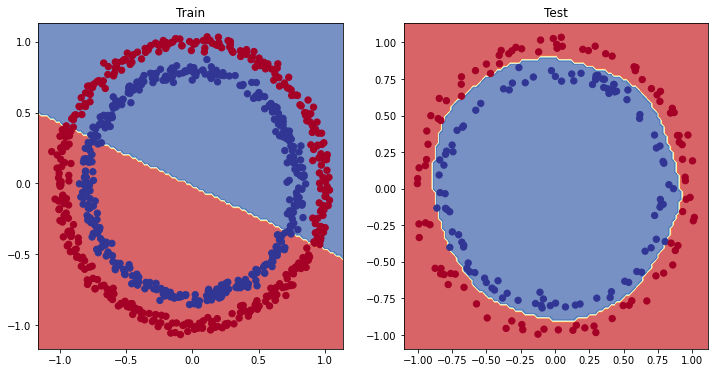

In [51]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train) #has power of linearity
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model3, X_test, y_test) #non linearity

##Multiclass Classification Problem

Binary classification: Cat vs dog

Multiclass Classification: sushi vs ramen vs pizza

tensor([[-8.4134,  6.9352],
        [-5.7665, -6.4312],
        [-6.0421, -6.7661],
        [ 3.9508,  0.6984],
        [ 4.2505, -0.2815]]) tensor([3, 2, 2, 1, 1])


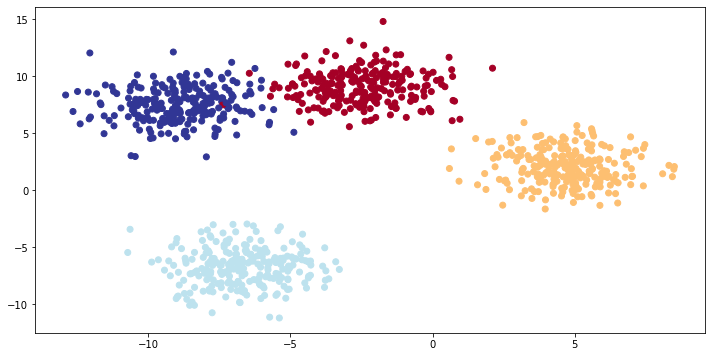

In [52]:
#Create a toy multiclass dataset

import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

#Set ythe hyperparameters for data creation
NUM_CLASSES =4
NUM_FEATURES = 2
RANDOM_SEED = 42

#Create multiclass data
X_blob, y_blob = make_blobs(n_samples = 1000,
                            n_features = NUM_FEATURES,
                            centers = NUM_CLASSES,
                            cluster_std = 1.5,
                            random_state = RANDOM_SEED)

#Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(X_blob[:5], y_blob[:5])

#Split into test and train sets
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, 
                                                                        y_blob,
                                                                        test_size = 0.2,
                                                                        random_state = RANDOM_SEED)

#Visualize
plt.figure(figsize = (12,6))
plt.scatter(X_blob[:,0], X_blob[:,1], c = y_blob, cmap=plt.cm.RdYlBu)

##Building the Model

In [53]:
#Create device agnostic code
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

In [54]:
#Build model
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units = 8):
    """Initializes multi class classification model 

    Args:
    input_features(int):Number of inputs to the model
    output_features(int): Number of output features (number of output classes)
    hidden_units(int): Number of hidden units between layers., default:8
    """
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features = input_features, out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units, out_features = output_features)
    )
  def forward(self, x):
    return self.linear_layer_stack(x)


model_4 = BlobModel(input_features = 2,
                    output_features = 4,
                    hidden_units = 8).to(DEVICE)

In [55]:
X_blob_train.shape, y_blob_train.shape

(torch.Size([800, 2]), torch.Size([800]))

In [56]:
###Create a loss function and optimizer for a multi class classification model

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params = model_4.parameters(), 
                            lr = 0.1) #lr is a hyperparameter

X_blob_train = X_blob_train.to(DEVICE)
y_blob_train = y_blob_train.to(DEVICE)
X_blob_test = X_blob_test.to(DEVICE)  
y_blob_test = y_blob_test.to(DEVICE)                       

In [57]:
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)
y_logits[:5] 

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834]], device='cuda:0')

In [58]:
#Converting logits into prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim = 1)

In [59]:
torch.max(y_pred_probs[0]) #the maximum prediction probability of the row

tensor(0.3244, device='cuda:0')

In [60]:
torch.argmax(y_pred_probs[0]) #the index of the highest prediction probability

tensor(1, device='cuda:0')

In [61]:
#Converting predictions into class labels
y_labels = torch.argmax(y_pred_probs, dim = 1)
print(y_labels[:5])
print(y_blob_test[:5])
#these are random outputs are do not line up with the test labels

tensor([1, 0, 0, 0, 0], device='cuda:0')
tensor([1, 3, 2, 1, 0], device='cuda:0')


In [62]:
##Building a training Loop
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000


for epoch in range(epochs): 
  model_4.train()
  #forward pass
  y_logits = model_4(X_blob_train)
  y_labels = torch.argmax(torch.softmax(y_logits, dim = 1), dim =1)
  #calculate loss
  loss = loss_fn(y_logits, y_blob_train)
  acc = accuracy_fn(y_true = y_blob_train, y_pred = y_labels)
  #optimizer zero grad
  optimizer.zero_grad()
  #loss backward
  loss.backward()
  #optimizer.step
  optimizer.step()

  ###testing loop
  model_4.eval()
  with torch.inference_mode():
    y_test_logits = model_4(X_blob_test)
    y_test_pred_probs = torch.softmax(y_test_logits, dim = 1)
    y_test_labels = torch.argmax(y_test_pred_probs, dim = 1)

    test_loss =  loss_fn(y_test_logits, y_blob_test)
    test_acc = accuracy_fn(y_true = y_blob_test, y_pred = y_test_labels)


  if epoch%100 == 0:
    print(f"Epoch: {epoch} | Train Loss: {loss:.3f} | Test loss: {test_loss:.3f} | Train Acc : {acc:.2f}% | Test accuracy: {test_acc:.2f}%")

Epoch: 0 | Train Loss: 1.159 | Test loss: 1.076 | Train Acc : 40.38% | Test accuracy: 48.00%
Epoch: 100 | Train Loss: 0.033 | Test loss: 0.024 | Train Acc : 99.25% | Test accuracy: 99.50%
Epoch: 200 | Train Loss: 0.027 | Test loss: 0.017 | Train Acc : 99.25% | Test accuracy: 99.50%
Epoch: 300 | Train Loss: 0.025 | Test loss: 0.014 | Train Acc : 99.25% | Test accuracy: 99.50%
Epoch: 400 | Train Loss: 0.024 | Test loss: 0.013 | Train Acc : 99.25% | Test accuracy: 99.50%
Epoch: 500 | Train Loss: 0.024 | Test loss: 0.013 | Train Acc : 99.25% | Test accuracy: 99.50%
Epoch: 600 | Train Loss: 0.023 | Test loss: 0.012 | Train Acc : 99.25% | Test accuracy: 99.50%
Epoch: 700 | Train Loss: 0.023 | Test loss: 0.012 | Train Acc : 99.25% | Test accuracy: 99.50%
Epoch: 800 | Train Loss: 0.023 | Test loss: 0.011 | Train Acc : 99.25% | Test accuracy: 99.50%
Epoch: 900 | Train Loss: 0.023 | Test loss: 0.011 | Train Acc : 99.25% | Test accuracy: 99.50%


In [63]:
#Make predictions

model_4.eval()
with torch.inference_mode():
  y_labels = torch.argmax(model_4(X_blob_test).to(DEVICE), dim = 1)

y_labels[:10], y_blob_test[:10]

(tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0'),
 tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0'))

###Visualize the decision boundary


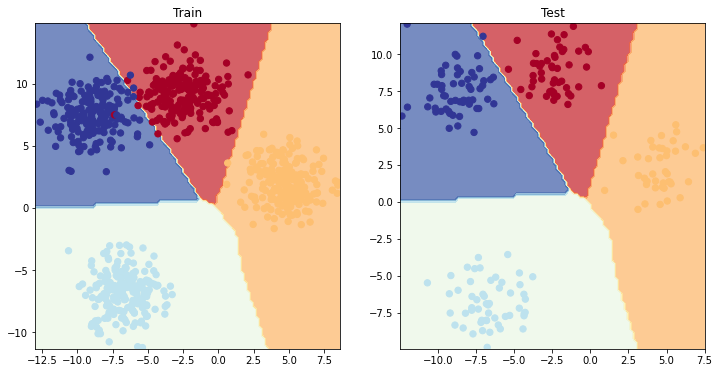

In [64]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

## A few more classification metrics

1. Accuracy (good for balanced classes)
2. Precision and Recall (unbalanced classes)
3. F1-Score (combines precision and recall)
4. Confusion Matrix
5. Classification Report


In [204]:
!pip install torchmetrics==0.10.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 529.7/529.7 KB 21.6 MB/s eta 0:00:00
  Attempting uninstall: torchmetrics
    Found existing installation: torchmetrics 0.11.1
    Uninstalling torchmetrics-0.11.1:
      Successfully uninstalled torchmetrics-0.11.1


In [65]:

from torchmetrics import Accuracy
#Set up Accuracy
torchmetrics_accuracy = Accuracy().to(DEVICE)

acc = torchmetrics_accuracy(y_labels, y_blob_test)
acc

tensor(0.9950, device='cuda:0')